At the end of 2019, the world saw the born of the Sars-cov-2 virus which genereate a disease called COVID19 (COrona VIrus disease). The high risk that we face with this virus is that the sympthons are related to a typical flu but generate a high damage un the lungs decreasing the oxygen level. The disminution of oxygen generate a high demand of intensive beds.

From WHO files

According to the WHO the incubation period for COVID-19, is on average 5-6 days, but can be extended to 14 days. However there some evidence that shows that exist different types of transmition, such as symptomatic, pre-symptomatic and a symptomatic.

The typical transmition is the symptomatic, this ocurrs when a person shown COVID symptomatic and can spread the virus conciently or inconciently respiratory droplest over thier enviroment. However, some cases has shown that a person can transmit COVID-19 without symptoms, (3 or 2 days) before present the typical symptoms. Finally there are some concern about the asyptomatic transmission according to the WHO: Asymptomatic transmission refers to transmission of the virus from a person, who does not develop symptoms. There are few reports of laboratory-confirmed cases who are truly asymptomatic, and to date, there has been no documente asymptomatic transmission. This does not exclude the possibility that it may occur. Asymptomatic cases have been reported as part of contact tracing efforts in some countries. Source https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200402-sitrep-73-covid-19.pdf?sfvrsn=5ae25bc7_2#:~:text=An%20asymptomatic%20laboratory%2Dconfirmed,more%20information%20becomes%20available.


The goal of this notebook is listed below:
* Understand the evolution of the covi19 in Mexico, there are a rate of 10% of deads though a visualization analysis


Key elements

* Incubation period can be expresed a GAMMA.
* Is most common the transmision after show symptoms.
* How we can modeled (explain pre-symtomatic transmition)
* how we can modeled asyntomatic transmition


In [1]:
import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib 
import datetime


Using matplotlib backend: MacOSX


In [23]:

strpath = '../src/'
m = []
i =0
if not os.path.isfile('report_data1.csv'):
    for filename in glob.glob(strpath+"*"):
        if filename.find('.csv')>0:
            date = '20'+filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
            print(date)
            df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
            df['FechaRegistro'] = date
            df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
            if i== 0:
                df0=df.copy()
                i=1
            else:
                frame = [df0,df]
                df0 = pd.concat(frame)
            del df
else:
    df0 = pd.read_csv('report_data.csv')
    df = pd.read_csv('../src/20200630.csv', encoding = "ISO-8859-1",dtype =str)
    df['FechaRegistro'] = '2020-06-30'
    df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
    frame = [df0,df]
    df0 = pd.concat(frame)
len(df0)

2020-06-04
2020-06-10
2020-04-12
2020-04-13
2020-06-11
2020-06-05
2020-06-13
2020-06-07
2020-06-06
2020-06-12
2020-06-16
2020-06-02
2020-04-14
2020-04-28
2020-04-29
2020-04-15
2020-06-03
2020-06-17
2020-06-01
2020-06-15
2020-06-29
2020-04-17
2020-04-16
2020-06-28
2020-06-14
2020-05-11
2020-05-05
2020-05-04
2020-05-10
2020-05-06
2020-05-12
2020-05-13
2020-05-07
2020-05-03
2020-05-17
2020-07-01
2020-05-16
2020-05-02
2020-05-14
2020-05-28
2020-07-02
2020-05-29
2020-05-01
2020-05-15
2020-05-18
2020-05-30
2020-05-24
2020-05-25
2020-05-31
2020-05-19
2020-05-27
2020-05-26
2020-05-22
2020-05-23
2020-05-21
2020-05-09
2020-05-08
2020-06-19
2020-06-25
2020-04-27
2020-04-26
2020-06-30
2020-06-24
2020-06-18
2020-06-26
2020-04-18
2020-04-30
2020-04-24
2020-04-25
2020-04-19
2020-06-27
2020-06-23
2020-04-21
2020-04-20
2020-06-22
2020-06-20
2020-06-08
2020-04-22
2020-04-23
2020-06-09
2020-06-21


20286920

In [45]:

dt = datetime.datetime.today()
print (dt.year)

2020


In [48]:
import datetime
print(datetime.datetime.now().strftime("%Y%m%d"))

20200703


In [61]:
today = (datetime.datetime.now()).strftime("%Y%m%d")
yesterday = (datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d")
ereyesterday = (datetime.datetime.now() - datetime.timedelta(days=2)).strftime("%Y%m%d")

In [57]:
ereyesterday.strftime("%Y%m%d")

str

In [25]:
df= pd.read_csv( '../src/'+today       +'.csv', encoding = "ISO-8859-1",dtype =str)
dfA= pd.read_csv('../src/'+yesterday   +'.csv', encoding = "ISO-8859-1",dtype =str)
dfB= pd.read_csv('../src/'+ereyesterday+'.csv', encoding = "ISO-8859-1",dtype =str)

In [27]:
a = set(df0.ID_REGISTRO.unique().tolist())- set(df.ID_REGISTRO.unique().tolist())

In [28]:
df1 = df0[df0.ID_REGISTRO.isin(list(a))]
df1 = df1.copy()

In [29]:
df1.FechaRegistro = pd.to_datetime(df1['FechaRegistro'], format='%Y-%m-%d')
df1 = df1.sort_values(by='FechaRegistro', ascending=False)

In [30]:
df1.ID_REGISTRO.nunique()

24972

In [31]:
df1.ID_REGISTRO.nunique()

24972

In [36]:
len(df)

610495

In [37]:
df[df.ID_REGISTRO=='1a7aea']

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI


In [43]:
df0[df0.ID_REGISTRO=='1a7aea'].sort_values('FechaRegistro',ascending=False).RESULTADO.unique()

array(['1'], dtype=object)

In [17]:
df2 = df1.drop_duplicates(keep='last')
df2 = df2.drop_duplicates('ID_REGISTRO',keep='last')

In [18]:
print(len(df1))
df3 = df1.drop_duplicates(keep='first')
# print(len(df3))
df3 = df3.drop_duplicates('ID_REGISTRO',keep='first')
# print(len(df3))

268424


In [19]:
len(df3)

39550

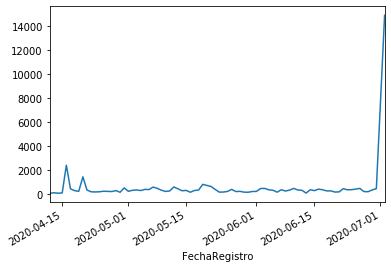

In [20]:
df3.groupby(['FechaRegistro'])['FechaRegistro'].count().plot()

In [21]:
df3.groupby(['FechaRegistro'])['FechaRegistro'].count().sort_values(ascending=False)

FechaRegistro
2020-07-02    14871
2020-04-16     2370
2020-04-20     1403
2020-05-19      775
2020-05-21      599
              ...  
2020-04-13       75
2020-04-15       61
2020-06-13       49
2020-04-14       40
2020-04-12       31
Name: FechaRegistro, Length: 80, dtype: int64

In [22]:
df3.groupby('RESULTADO')['RESULTADO'].count()

RESULTADO
1     2558
2     4378
3    32614
Name: RESULTADO, dtype: int64

In [24]:
df0.FechaRegistro.unique()

array(['2020-06-04', '2020-06-10', '2020-04-12', '2020-04-13',
       '2020-06-11', '2020-06-05', '2020-06-13', '2020-06-07',
       '2020-06-06', '2020-06-12', '2020-06-16', '2020-06-02',
       '2020-04-14', '2020-04-28', '2020-04-29', '2020-04-15',
       '2020-06-03', '2020-06-17', '2020-06-01', '2020-06-15',
       '2020-06-29', '2020-04-17', '2020-04-16', '2020-06-28',
       '2020-06-14', '2020-05-11', '2020-05-05', '2020-05-04',
       '2020-05-10', '2020-05-06', '2020-05-12', '2020-05-13',
       '2020-05-07', '2020-05-03', '2020-05-17', '2020-07-01',
       '2020-05-16', '2020-05-02', '2020-05-14', '2020-05-28',
       '2020-07-02', '2020-05-29', '2020-05-01', '2020-05-15',
       '2020-05-18', '2020-05-30', '2020-05-24', '2020-05-25',
       '2020-05-31', '2020-05-19', '2020-05-27', '2020-05-26',
       '2020-05-22', '2020-05-23', '2020-05-21', '2020-05-09',
       '2020-05-08', '2020-06-19', '2020-06-25', '2020-04-27',
       '2020-04-26', '2020-06-30', '2020-06-24', '2020-